<a href="https://colab.research.google.com/github/mrzResearchArena/ACP/blob/master/ACP-740-bits31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [1]. Google Drive Initialization:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd 'drive/My Drive/Colab-Notebooks'

/content/drive/My Drive/Colab-Notebooks


In [4]:
ls -1

0_FINAL_anti_peptide_model_AC240-tensorboard.ipynb
0_FINAL_anti_peptide_model_ACP740-tensorboard.ipynb
500-164.h5
544_encoded_sequences_740.npy
ACP164.npy
ACP240_labels.npy
acp240.txt
ACP-500-164.h5
ACP500.npy
ACP740_labels.npy
ACP-740-tensorboard.ipynb
acp740.txt
bits-164.npy
bits-240.npy
bits-500.npy
bits-740.npy
blosum-164.npy
blosum-240.npy
blosum-500.npy
blosum62-acp240.npy
blosum62-acp740.npy
blosum-740.npy
bpf-164.npy
bpf-240.npy
bpf-500.npy
bpf-740.npy
BPF_coded_ACP164_sequences.npy
BPF_coded_ACP240_sequences.npy
BPF_coded_ACP500_sequences.npy
BPF_coded_ACP740_sequences.npy
dataset-50000.csv
dataset_to_one_hot_vector_representation.pkl
drive/
eight-240.npy
eight-740.npy
kmer_k_3_ACP240.npy
kmer_k_3_ACP740.npy
logs/
mACP-240.ipynb
mACP-740.ipynb
model-240b.png
model-240-eight.png
model-240.png
model-50000.png
model-500-164.png
model-740-eight.png
model-740.png
model.png
multichannel.png
physico_coded_ACP164_sequences.npy
physico_coded_ACP240_sequences.npy
physico_coded_ACP500_se

## [2]. Load Deep Learning API (Keras):

In [5]:
# # Initialize TF-2.x:
# try:
#     %tensorflow_version 2.x  # Colab only.
# except Exception:
#     pass

# import tensorflow as tf
# print('We\'re using TF-{}.'.format(tf.__version__))

# # Colab Auto Click: [https://paste.ubuntu.com/p/R78fGBJbjb/]

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
We're using TF-2.2.0.


In [5]:
# Deep Neural Networks:
# import tensorflow as tf; print('We\'re using TF-{}.'.format(tf.__version__))
import keras; print('We\'re using Keras-{}.'.format(keras.__version__))
from keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                                     LSTM, GRU, Embedding, Bidirectional, Concatenate)
from keras.regularizers import (l1, l2, l1_l2)
from keras.optimizers import (RMSprop, Adam, SGD)
from keras.models import (Sequential, Model)

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)

#Utilities:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from keras.utils import plot_model                        # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)

#end-import

Using TensorFlow backend.


We're using Keras-2.3.1.


In [6]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

## [3]. Load Datasets:

In [20]:
T = 15 # terminus_length

X1 = np.load('bpf-740.npy')
X2 = np.load('bits-740.npy')
X3 = np.load('blosum-740.npy')


X1 = X1[:,0:T,:]
X2 = X2[:,0:T,:]
X3 = X3[:,0:T,:]


Y  = [1 for _ in range(376)]
Y += [0 for _ in range(364)]

Y = labelEncoding(Y, dtype=int)


print(X1.shape)
print(X2.shape)
print(X3.shape)
print(Y.shape)

(740, 15, 20)
(740, 15, 31)
(740, 15, 20)
(740, 2)


## [4]. Generate Model:

In [21]:
# def Network():
#     ### Head-1:
#     input1 = Input(shape=X1[0].shape) # T=20

#     x = Conv1D(filters=32, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input1)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     x = Conv1D(filters=16, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     head1 = Flatten()(x)


#     ### Head-2:
#     input2 = Input(shape=X2[0].shape) # T=7

#     x = Conv1D(filters=16, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(input2)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     x = Conv1D(filters=4, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     head2 = Flatten()(x)


#     ### Head-3:
#     input3 = Input(shape=X3[0].shape) 
    
#     x = Conv1D(filters=16, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(input3)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     x = Conv1D(filters=12, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
#     x = BatchNormalization()(x)
#     x = Dropout(rate=0.5)(x)

#     head3 = Flatten()(x)


#     # merge
#     merge = concatenate(inputs=[head1, head2, head3])

#     output = Dense(units=16, activation='relu',)(merge)
#     output = BatchNormalization()(output)
#     output = Dropout(rate=0.5)(output)

#     output = Dense(units=8, activation='relu',)(output)
#     output = BatchNormalization()(output)
#     output = Dropout(rate=0.5)(output)

#     output = Dense(units=2, activation='softmax')(output)

#     return Model(inputs=[input1, input2, input3], outputs=[output])
# #end-def

def Network():
    ### Head-1:
    input1 = Input(shape=X1[0].shape)

    x = Conv1D(filters=10, kernel_size=4, padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(input1)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.80)(x)

    x = Conv1D(filters=8, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    head1 = Flatten()(x)


    ### Head-2:
    input2 = Input(shape=X2[0].shape)

    x = Conv1D(filters=10, kernel_size=4, padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(input2)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=8, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    head2 = Flatten()(x)


    ### Head-3:
    input3 = Input(shape=X3[0].shape)
    
    x = Conv1D(filters=10, kernel_size=4, padding='same', activation='relu',)(input3)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=8, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    head3 = Flatten()(x)


    # merge
    merge = Concatenate()([head1, head2, head3])

    output = Dense(units=8, activation='relu', kernel_regularizer=l2(l=0.01))(merge)
    output = BatchNormalization()(output)
    output = Dropout(rate=0.70)(output)

    output = Dense(units=2, activation='softmax')(output)

    return Model(inputs=[input1, input2, input3], outputs=[output])
#end-def

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 15, 20)       0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           (None, 15, 31)       0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 15, 20)       0                                            
__________________________________________________________________________________________________
conv1d_42 (Conv1D)              (None, 15, 10)       810         input_22[0][0]                   
____________________________________________________________________________________________

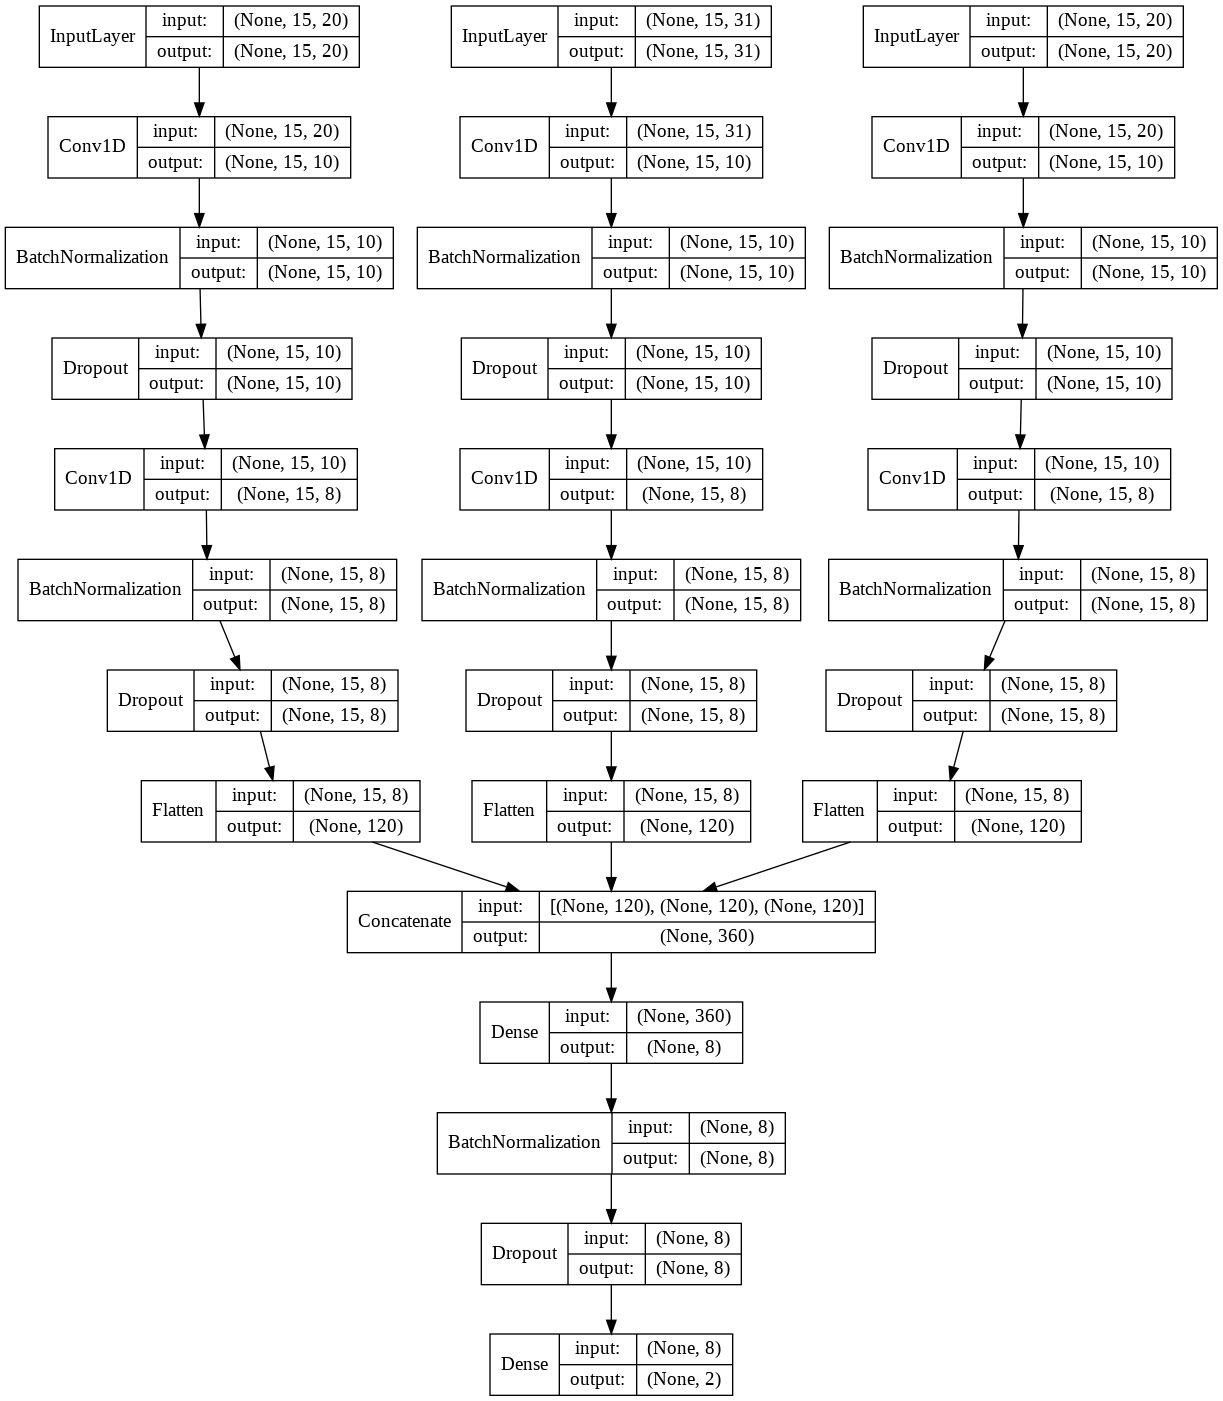

In [22]:
model = Network()
model.summary()
plot_model(model, to_file='model-740.png', show_shapes=True, show_layer_names=False, expand_nested=True)

## [5]. Run Model:

Train on 592 samples, validate on 148 samples
Epoch 1/500
592/592 [==============================] - 2s 3ms/step - loss: 1.9850 - accuracy: 0.4628 - val_loss: 1.3622 - val_accuracy: 0.5068
Epoch 2/500
592/592 [==============================] - 1s 874us/step - loss: 1.5569 - accuracy: 0.5186 - val_loss: 1.3342 - val_accuracy: 0.4932
Epoch 3/500
592/592 [==============================] - 0s 841us/step - loss: 1.3949 - accuracy: 0.5118 - val_loss: 1.2907 - val_accuracy: 0.4865
Epoch 4/500
592/592 [==============================] - 1s 877us/step - loss: 1.2889 - accuracy: 0.5338 - val_loss: 1.2389 - val_accuracy: 0.4797
Epoch 5/500
592/592 [==============================] - 1s 868us/step - loss: 1.2307 - accuracy: 0.5152 - val_loss: 1.1849 - val_accuracy: 0.4797
Epoch 6/500
592/592 [==============================] - 1s 888us/step - loss: 1.1710 - accuracy: 0.4932 - val_loss: 1.1246 - val_accuracy: 0.4797
Epoch 7/500
592/592 [==============================] - 1s 855us/step - loss: 1.0901 - 

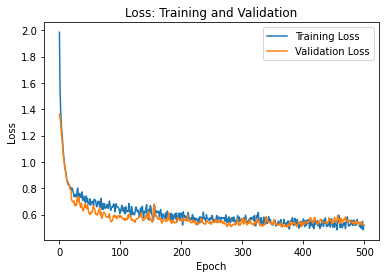

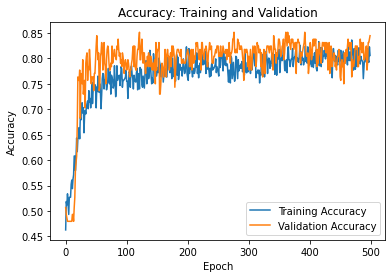

#################################################
Train on 592 samples, validate on 148 samples
Epoch 1/500
592/592 [==============================] - 2s 3ms/step - loss: 2.0652 - accuracy: 0.4797 - val_loss: 1.4238 - val_accuracy: 0.5068
Epoch 2/500
592/592 [==============================] - 1s 852us/step - loss: 1.7274 - accuracy: 0.5203 - val_loss: 1.3722 - val_accuracy: 0.5270
Epoch 3/500
592/592 [==============================] - 1s 853us/step - loss: 1.4649 - accuracy: 0.5473 - val_loss: 1.3213 - val_accuracy: 0.5270
Epoch 4/500
592/592 [==============================] - 1s 869us/step - loss: 1.3365 - accuracy: 0.5591 - val_loss: 1.2734 - val_accuracy: 0.5608
Epoch 5/500
592/592 [==============================] - 1s 861us/step - loss: 1.2593 - accuracy: 0.5507 - val_loss: 1.2130 - val_accuracy: 0.5811
Epoch 6/500
592/592 [==============================] - 1s 860us/step - loss: 1.2175 - accuracy: 0.5557 - val_loss: 1.1624 - val_accuracy: 0.6216
Epoch 7/500
592/592 [===============

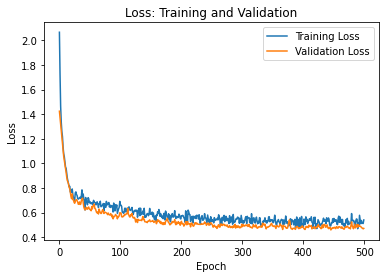

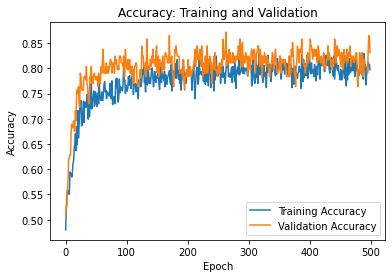

#################################################
Train on 592 samples, validate on 148 samples
Epoch 1/500
592/592 [==============================] - 2s 3ms/step - loss: 1.8039 - accuracy: 0.4848 - val_loss: 1.3470 - val_accuracy: 0.5541
Epoch 2/500
592/592 [==============================] - 0s 822us/step - loss: 1.5188 - accuracy: 0.5118 - val_loss: 1.3245 - val_accuracy: 0.5270
Epoch 3/500
592/592 [==============================] - 0s 831us/step - loss: 1.3617 - accuracy: 0.4966 - val_loss: 1.2711 - val_accuracy: 0.4932
Epoch 4/500
592/592 [==============================] - 0s 824us/step - loss: 1.2597 - accuracy: 0.5253 - val_loss: 1.2129 - val_accuracy: 0.5000
Epoch 5/500
592/592 [==============================] - 1s 850us/step - loss: 1.1949 - accuracy: 0.5439 - val_loss: 1.1585 - val_accuracy: 0.4865
Epoch 6/500
592/592 [==============================] - 0s 843us/step - loss: 1.1304 - accuracy: 0.5439 - val_loss: 1.1112 - val_accuracy: 0.4865
Epoch 7/500
592/592 [===============

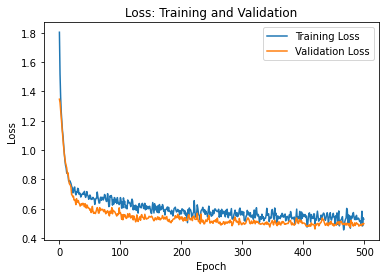

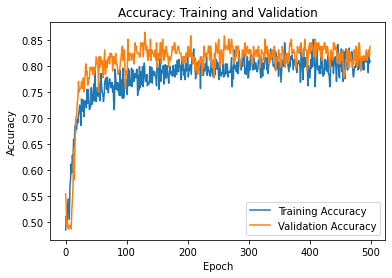

#################################################
Train on 592 samples, validate on 148 samples
Epoch 1/500
592/592 [==============================] - 2s 3ms/step - loss: 1.7912 - accuracy: 0.5000 - val_loss: 1.3910 - val_accuracy: 0.4730
Epoch 2/500
592/592 [==============================] - 0s 824us/step - loss: 1.5113 - accuracy: 0.5169 - val_loss: 1.3236 - val_accuracy: 0.4392
Epoch 3/500
592/592 [==============================] - 1s 873us/step - loss: 1.3449 - accuracy: 0.5152 - val_loss: 1.2654 - val_accuracy: 0.4527
Epoch 4/500
592/592 [==============================] - 1s 848us/step - loss: 1.2203 - accuracy: 0.5355 - val_loss: 1.1925 - val_accuracy: 0.4527
Epoch 5/500
592/592 [==============================] - 1s 851us/step - loss: 1.1674 - accuracy: 0.5287 - val_loss: 1.1356 - val_accuracy: 0.4527
Epoch 6/500
592/592 [==============================] - 0s 810us/step - loss: 1.1097 - accuracy: 0.5490 - val_loss: 1.0753 - val_accuracy: 0.4527
Epoch 7/500
592/592 [===============

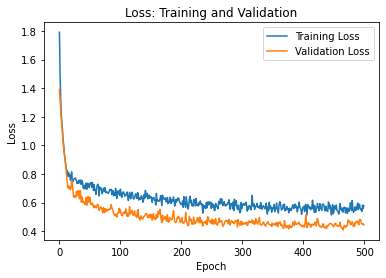

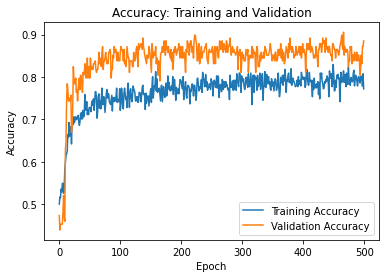

#################################################
Train on 592 samples, validate on 148 samples
Epoch 1/500
592/592 [==============================] - 2s 3ms/step - loss: 1.6379 - accuracy: 0.5186 - val_loss: 1.3326 - val_accuracy: 0.5946
Epoch 2/500
592/592 [==============================] - 1s 851us/step - loss: 1.3740 - accuracy: 0.5389 - val_loss: 1.2673 - val_accuracy: 0.6622
Epoch 3/500
592/592 [==============================] - 0s 836us/step - loss: 1.2456 - accuracy: 0.5405 - val_loss: 1.1864 - val_accuracy: 0.6149
Epoch 4/500
592/592 [==============================] - 1s 863us/step - loss: 1.1384 - accuracy: 0.5591 - val_loss: 1.1063 - val_accuracy: 0.5743
Epoch 5/500
592/592 [==============================] - 0s 827us/step - loss: 1.0761 - accuracy: 0.5270 - val_loss: 1.0332 - val_accuracy: 0.6149
Epoch 6/500
592/592 [==============================] - 1s 854us/step - loss: 1.0109 - accuracy: 0.5236 - val_loss: 0.9804 - val_accuracy: 0.6689
Epoch 7/500
592/592 [===============

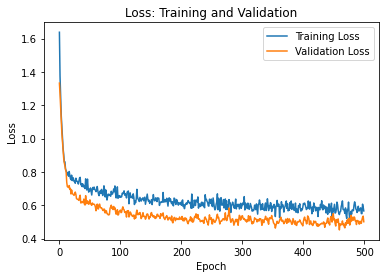

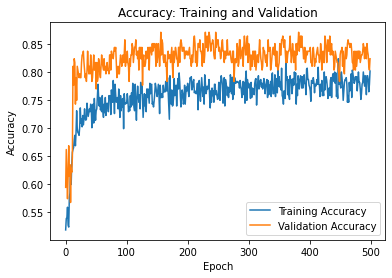

#################################################
[0.8445945978164673, 0.8310810923576355, 0.837837815284729, 0.8851351141929626, 0.8243243098258972]
Accuracy: 0.84
Sensitivity: 0.8479
Specificity: 0.8372
MCC: 0.6865
Precision: 0.8482


In [25]:
setEpochNumber     = 500     # 2,500 performed well.
setBatchSizeNumber = 16
####################################################

cv = KFold(n_splits=5, shuffle=True, random_state=101)

Accuracy = []
Sensitivity = []
Specificity = []
Precision = []
MCC = []

# CM = np.array([
#      [0, 0],
#      [0, 0],
# ], dtype=int)

for train, test in cv.split(Y):

    # Compile Model:
    model = Network()
    model.compile(optimizer=Adam(lr=0.005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Run Model:
    results = model.fit(x=[X1[train,:,:],X2[train,:,:],X3[train,:,:]], y=[Y[train,:]],
                        validation_data=([X1[test,:,:], X2[test,:,:], X3[test,:,:]], [Y[test,:]]),
                        epochs=setEpochNumber, batch_size=setBatchSizeNumber, verbose=1)

    # Evaluate the Model:
    accuracy = model.evaluate(x=[X1[test,:,:], X2[test,:,:], X3[test,:,:]], y=Y[test,:])
    Accuracy.append(accuracy[1])
    
    # Performance Metices:
    Yactual = Y[test,:].argmax(axis=1)
    Yp = model.predict([X1[test,:,:], X2[test,:,:], X3[test,:,:]])
    Yp = Yp.argmax(axis=1)

    CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
    TN, FP, FN, TP = CM.ravel()

    MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
    Sensitivity.append( TP / (TP + FN) )
    Specificity.append( TN / (TN + FP) )
    Precision.append(precision_score(y_true=Yactual, y_pred=Yp))
    
    
    # Performance Plot
    print('#################################################')
    print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
    lossPlot(results)
    accuracyPlot(results)
    print('#################################################')
#end-for

print(Accuracy)
print('Accuracy: {:.2f}'.format(np.sum(Accuracy)/5.0))
print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))